In [1]:
!pip install hypernetx matplotlib scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 579.3/579.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you have decorator 5.1.1 which is incompatible.


In [1]:
!pip install networkx numpy scikit-learn matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import networkx as nx
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Step 1: Load the undirected YouTube network data from the file
def load_undirected_youtube_data(filename,limit=100):
    G = nx.Graph()  # Create an undirected graph
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith("#"):  # Skip comment lines
                continue
            parts = line.strip().split()
            node1 = int(parts[0])  # First node in the edge
            node2 = int(parts[1])  # Second node in the edge
            G.add_edge(node1, node2)  # Add an undirected edge between the nodes
    return G

# Step 2: Compute the Laplacian matrix
def compute_laplacian(G):
    # Get the Laplacian matrix of the graph
    L = nx.laplacian_matrix(G).toarray()
    return L

# Step 3: Perform Spectral Clustering
def spectral_clustering_on_graph(L, num_clusters=5):
    # Use spectral clustering on the Laplacian matrix
    clustering = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', assign_labels='kmeans')
    clustering.fit(L)
    return clustering.labels_

# Step 4: Visualize the clusters
def visualize_clusters(G, labels):
    # Create a layout for the graph nodes
    pos = nx.spring_layout(G)  # Spring layout for better visualization

    # Draw the graph with node colors based on cluster labels
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, node_color=labels, with_labels=False, node_size=20, cmap=plt.cm.rainbow)
    plt.title('Spectral Clustering of YouTube Network')
    plt.show()


In [ ]:
# Main function to run the process
def main():
    filename = '/content/drive/My Drive/CSE551/Undirected_Youtube_network.txt'

    # Step 1: Load the data
    print("Loading YouTube network data...")
    G = load_undirected_youtube_data(filename)
    print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

    # Step 2: Compute the Laplacian matrix
    print("Computing the Laplacian matrix...")
    L = compute_laplacian(G)

    # Step 3: Perform spectral clustering
    num_clusters = 5  # Set the number of clusters
    print(f"Performing spectral clustering with {num_clusters} clusters...")
    labels = spectral_clustering_on_graph(L, num_clusters=num_clusters)

    # Step 4: Visualize the results
    print("Visualizing the clusters...")
    visualize_clusters(G, labels)

if __name__ == "__main__":
    main()


Loading YouTube network data...
Graph has 1134890 nodes and 2987624 edges.
Computing the Laplacian matrix...




---



---



---



In [4]:
!pip install python-louvain

***graph-based approach for community detection***

In [ ]:
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt

# Step 1: Load the dataset from the file
def load_undirected_youtube_data(filename):
    G = nx.Graph()  # Create an empty undirected graph
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("#") or not line.strip():
                continue  # Skip comments and empty lines
            # Each line represents an edge between two nodes (FromNodeId, ToNodeId)
            node1, node2 = map(int, line.split())
            G.add_edge(node1, node2)  # Add an edge between node1 and node2
    return G

# Step 2: Apply Louvain algorithm for community detection
def apply_louvain(G):
    partition = community_louvain.best_partition(G)  # Louvain algorithm
    return partition

# Step 3: Visualize the communities
def visualize_communities(G, partition, filename, node_limit=2000):
    # Assign a color to each node based on its community
    pos = nx.spring_layout(G)  # Layout for visualization
    cmap = plt.get_cmap('viridis', max(partition.values()) + 1)  # Color map for communities

    # Limit the number of nodes to visualize if the graph is too large
    subgraph_nodes = list(G.nodes())[:node_limit]
    subgraph = G.subgraph(subgraph_nodes)

    # Draw the graph with community colors
    plt.figure(figsize=(12, 10))
    nx.draw(subgraph, pos, node_color=[partition.get(node, 0) for node in subgraph_nodes],
            node_size=20, cmap=cmap, with_labels=False, edge_color="gray")

    plt.title("Community Detection (Graph-based) - Louvain Algorithm")
    plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="Community ID")
    plt.savefig(f'{filename}_communities.png')
    plt.show()

# Step 4: Compute modularity
def compute_modularity(G, partition):
    mod = community_louvain.modularity(partition, G)  # Calculate modularity
    return mod

# Main function to run the process
def main():
    filename = '/content/drive/My Drive/CSE551/Undirected_Youtube_network.txt'  # Path to your file

    # Step 1: Load the YouTube data as an undirected graph
    print("Loading YouTube network data...")
    G = load_undirected_youtube_data(filename)
    print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

    # Step 2: Apply Louvain community detection
    print("Applying Louvain community detection...")
    partition = apply_louvain(G)

    # Step 3: Compute and print modularity
    modularity = compute_modularity(G, partition)
    print(f"Modularity: {modularity:.4f}")

    # Step 4: Visualize the communities (limit to 2000 nodes for better visualization)
    print("Visualizing communities...")
    visualize_communities(G, partition, "youtube_network", node_limit=2000)

if __name__ == "__main__":
    main()


Loading YouTube network data...
Graph has 1134890 nodes and 2987624 edges.
Applying Louvain community detection...
Modularity: 0.7211
Visualizing communities...




---



---



---



# ***Apply k-means clustering on the Laplacian eigenvectors***

In [ ]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.sparse.csgraph import laplacian
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigsh

# Step 1: Load the undirected YouTube network data (limiting edges)
def load_undirected_youtube_data(filename, limit=500):
    G = nx.Graph()  # Create an undirected graph
    edge_count = 0
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith("#"):  # Skip comment lines
                continue
            parts = line.strip().split()
            node1 = int(parts[0])  # First node in the edge
            node2 = int(parts[1])  # Second node in the edge
            G.add_edge(node1, node2)  # Add an undirected edge between the nodes
            edge_count += 1
            if edge_count >= limit:  # Stop after loading 'limit' edges
                break
    return G

# Step 2: Remove isolated nodes from the graph
def remove_isolated_nodes(G):
    isolated_nodes = list(nx.isolates(G))
    G.remove_nodes_from(isolated_nodes)
    return G

# Step 3: Compute the sparse Laplacian matrix using scipy
def compute_sparse_laplacian(G):
    adjacency_matrix = nx.adjacency_matrix(G)  # Get the adjacency matrix
    L = laplacian(adjacency_matrix, normed=True)  # Compute the normalized Laplacian matrix
    return csr_matrix(L)  # Return as a sparse matrix

# Step 4: Get the eigenvectors of the Laplacian matrix
def get_laplacian_eigenvectors(L, num_clusters=5):
    # Compute the smallest 'num_clusters' eigenvectors
    eigenvalues, eigenvectors = eigsh(L, k=num_clusters, which='SM')
    return eigenvectors

# Step 5: Apply k-means on the Laplacian's eigenvectors
def spectral_clustering_kmeans(eigenvectors, num_clusters=5):
    kmeans = KMeans(n_clusters=num_clusters)
    labels = kmeans.fit_predict(eigenvectors)  # Apply k-means on the eigenvectors
    return labels

# Step 6: Visualize the clusters
def visualize_clusters(G, labels):
    # Create a layout for the graph nodes
    pos = nx.spring_layout(G, seed=42)  # Spring layout for better visualization

    # Draw the graph with node colors based on cluster labels
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, node_color=labels, with_labels=False, node_size=20, cmap=plt.cm.rainbow)
    plt.title('Spectral Clustering of YouTube Network (Sampled Data)')
    plt.show()



Loading YouTube network data (sampled edges)...
Graph has 466 nodes and 500 edges.
Removing isolated nodes...
After removing isolated nodes: 466 nodes and 500 edges.
Computing the sparse Laplacian matrix...
Computing eigenvectors of the Laplacian matrix...
Applying k-means clustering...
Visualizing the clusters...


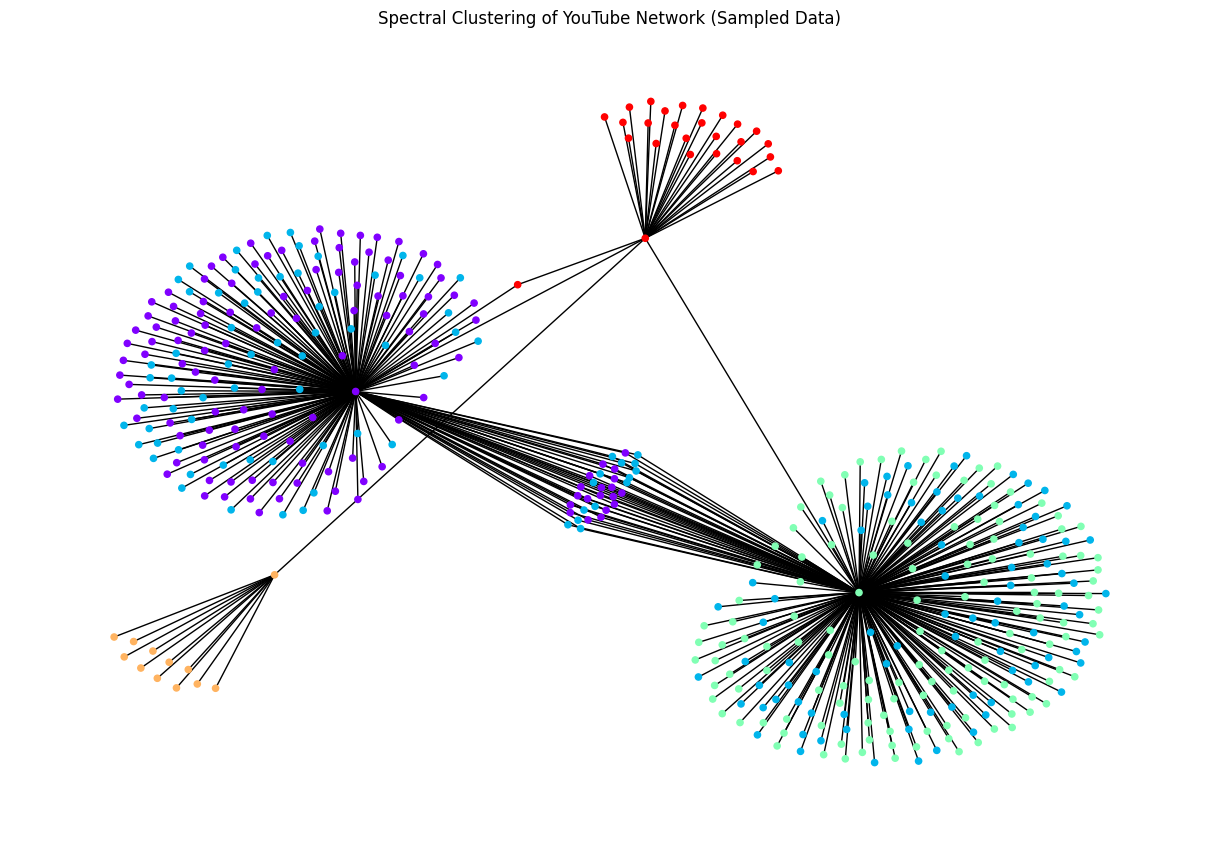

In [ ]:
# Main function to run the process
def main():
    filename = '/content/drive/My Drive/CSE551/Undirected_Youtube_network.txt'  # Path to your file

    # Step 1: Load the data (limit to first 500 edges)
    print("Loading YouTube network data (sampled edges)...")
    G = load_undirected_youtube_data(filename, limit=500)  # Limiting to 500 edges
    print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

    # Step 2: Remove isolated nodes
    print("Removing isolated nodes...")
    G = remove_isolated_nodes(G)
    print(f"After removing isolated nodes: {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

    # Step 3: Compute the Laplacian matrix in sparse format
    print("Computing the sparse Laplacian matrix...")
    L = compute_sparse_laplacian(G)

    # Step 4: Get the eigenvectors of the Laplacian matrix
    print("Computing eigenvectors of the Laplacian matrix...")
    eigenvectors = get_laplacian_eigenvectors(L, num_clusters=5)

    # Step 5: Perform clustering using k-means on the eigenvectors
    print("Applying k-means clustering...")
    labels = spectral_clustering_kmeans(eigenvectors, num_clusters=5)

    # Step 6: Visualize the results
    print("Visualizing the clusters...")
    visualize_clusters(G, labels)

if __name__ == "__main__":
    main()

Loading YouTube network data (sampled edges)...
Graph has 937 nodes and 1000 edges.
Removing isolated nodes...
After removing isolated nodes: 937 nodes and 1000 edges.
Computing the sparse Laplacian matrix...
Computing eigenvectors of the Laplacian matrix...
Applying k-means clustering...
Visualizing the clusters...


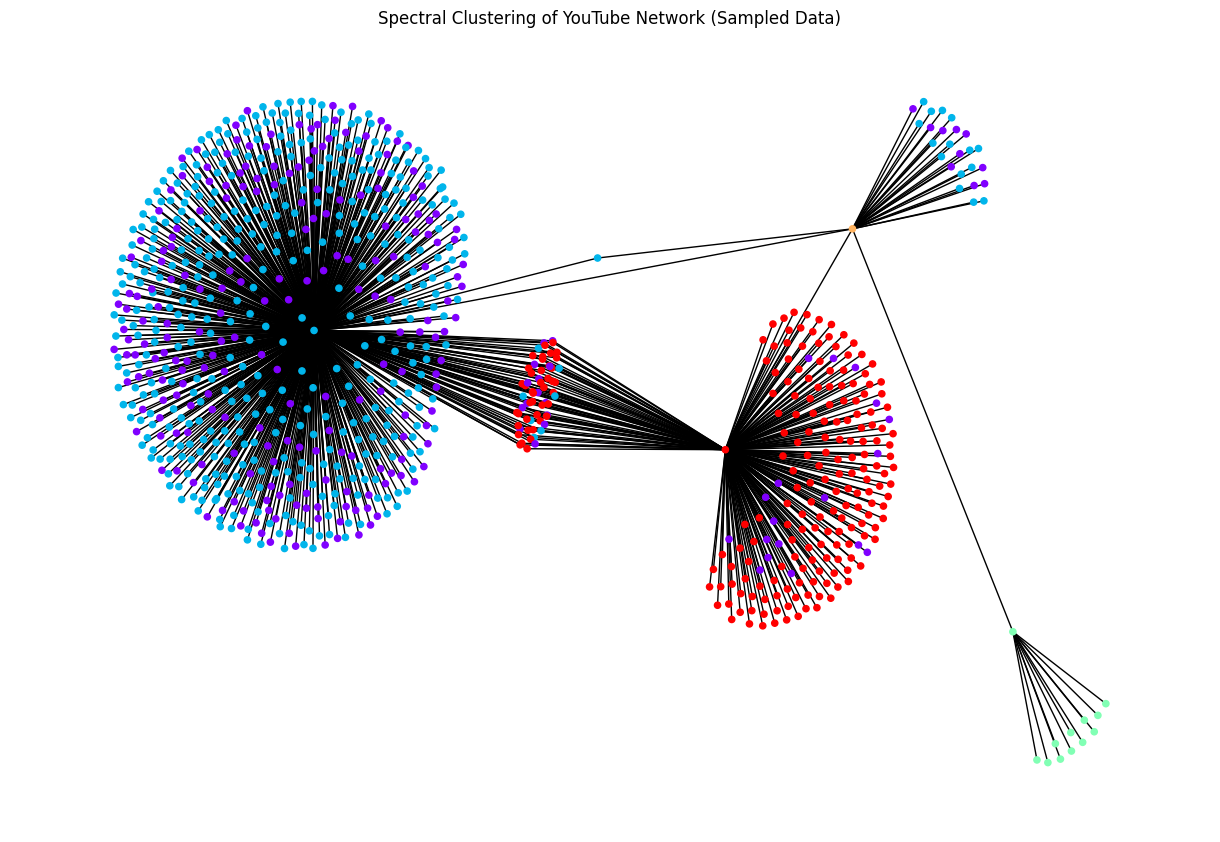

In [ ]:
# Main function to run the process
def main():
    filename = '/content/drive/My Drive/CSE551/Undirected_Youtube_network.txt'  # Path to your file

    # Step 1: Load the data (limit to first 500 edges)
    print("Loading YouTube network data (sampled edges)...")
    G = load_undirected_youtube_data(filename, limit=1000)  # Limiting to 500 edges
    print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

    # Step 2: Remove isolated nodes
    print("Removing isolated nodes...")
    G = remove_isolated_nodes(G)
    print(f"After removing isolated nodes: {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

    # Step 3: Compute the Laplacian matrix in sparse format
    print("Computing the sparse Laplacian matrix...")
    L = compute_sparse_laplacian(G)

    # Step 4: Get the eigenvectors of the Laplacian matrix
    print("Computing eigenvectors of the Laplacian matrix...")
    eigenvectors = get_laplacian_eigenvectors(L, num_clusters=5)

    # Step 5: Perform clustering using k-means on the eigenvectors
    print("Applying k-means clustering...")
    labels = spectral_clustering_kmeans(eigenvectors, num_clusters=5)

    # Step 6: Visualize the results
    print("Visualizing the clusters...")
    visualize_clusters(G, labels)

if __name__ == "__main__":
    main()



---



---



---



In [ ]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.sparse.csgraph import laplacian
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigsh

# Step 1: Load the undirected YouTube network data (limiting edges)
def load_undirected_youtube_data(filename, limit=500):
    G = nx.Graph()  # Create an undirected graph
    edge_count = 0
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith("#"):  # Skip comment lines
                continue
            parts = line.strip().split()
            node1 = int(parts[0])  # First node in the edge
            node2 = int(parts[1])  # Second node in the edge
            G.add_edge(node1, node2)  # Add an undirected edge between the nodes
            edge_count += 1
            if edge_count >= limit:  # Stop after loading 'limit' edges
                break
    return G

# Step 2: Remove isolated nodes from the graph
def remove_isolated_nodes(G):
    isolated_nodes = list(nx.isolates(G))
    G.remove_nodes_from(isolated_nodes)
    return G

# Step 3: Compute the sparse Laplacian matrix using scipy
def compute_sparse_laplacian(G):
    adjacency_matrix = nx.adjacency_matrix(G)  # Get the adjacency matrix
    L = laplacian(adjacency_matrix, normed=True)  # Compute the normalized Laplacian matrix
    return csr_matrix(L)  # Return as a sparse matrix

# Step 4: Get the eigenvectors of the Laplacian matrix
def get_laplacian_eigenvectors(L, num_clusters=5):
    # Compute the smallest 'num_clusters' eigenvectors
    eigenvalues, eigenvectors = eigsh(L, k=num_clusters, which='SM')
    print(f"Eigenvalues:\n{eigenvalues}\n")  # Print the eigenvalues for each cluster
    return eigenvectors

# Step 5: Apply k-means on the Laplacian's eigenvectors
def spectral_clustering_kmeans(eigenvectors, num_clusters=5):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(eigenvectors)  # Apply k-means on the eigenvectors
    print(f"Cluster labels for nodes:\n{labels}\n")  # Print the cluster labels
    return labels

# Step 6: Visualize the clusters
def visualize_clusters(G, labels):
    # Create a layout for the graph nodes
    pos = nx.spring_layout(G, seed=42)  # Spring layout for better visualization

    # Draw the graph with node colors based on cluster labels
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, node_color=labels, with_labels=False, node_size=20, cmap=plt.cm.rainbow)
    plt.title('Spectral Clustering of YouTube Network (Sampled Data)')
    plt.show()


Loading YouTube network data (sampled edges)...
Graph has 466 nodes and 500 edges.

Removing isolated nodes...
After removing isolated nodes: 466 nodes and 500 edges.

Computing the sparse Laplacian matrix...
Sparse Laplacian matrix shape: (466, 466)

Computing eigenvectors of the Laplacian matrix...
First 5 eigenvectors (rows):
[[-1.70293864e-01  3.75485468e-01  4.31611854e-01  3.79090797e-01
   0.00000000e+00]
 [-5.05964426e-01 -1.50375749e-01 -3.43890213e-01  3.21065143e-01
   0.00000000e+00]
 [-1.09544512e-01  5.80583908e-01 -3.10584057e-01 -2.33366400e-01
   0.00000000e+00]
 [-4.54972527e-01 -1.00996463e-01  3.01077087e-01 -4.38287308e-01
  -2.08166817e-17]
 [-3.16227766e-02  7.15197299e-02  8.70322016e-02  7.69452076e-02
   3.81770103e-02]]

Applying k-means clustering...
Visualizing the clusters...


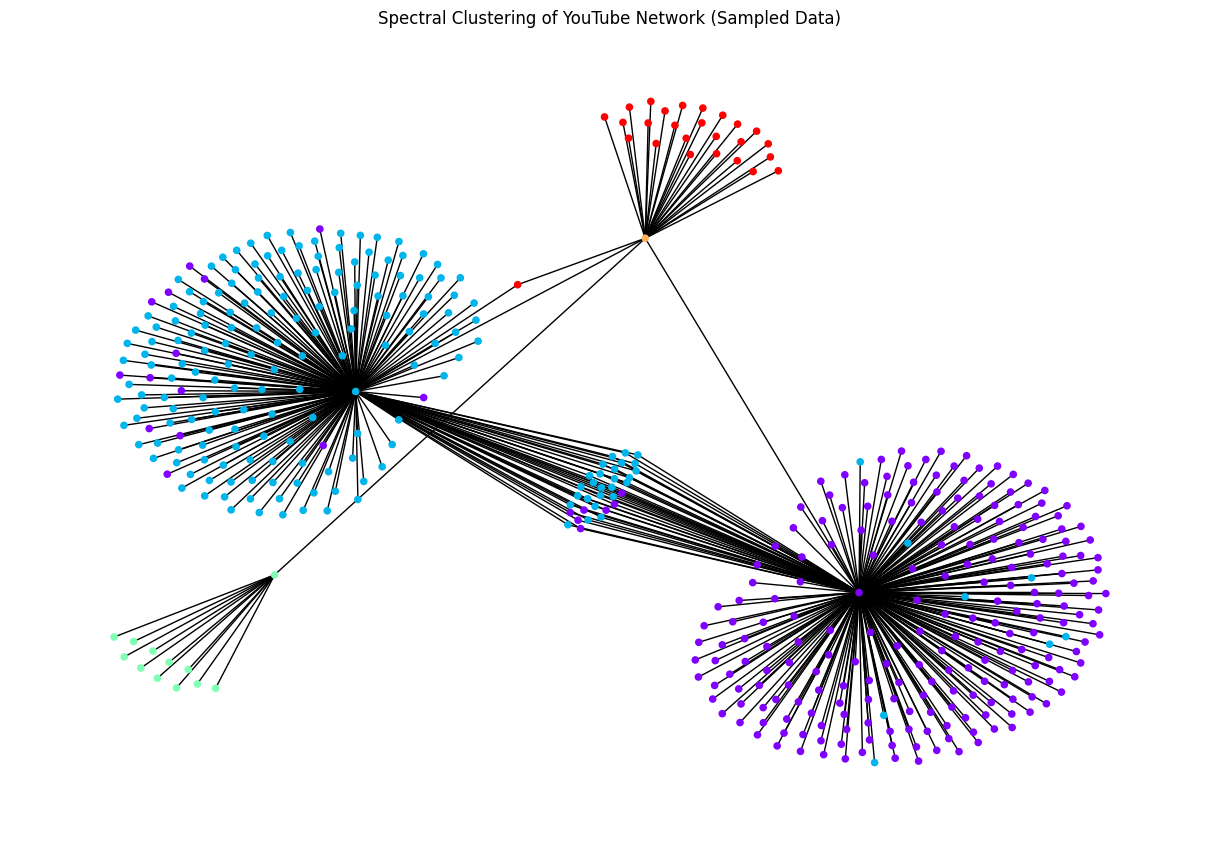

In [ ]:
# Main function to run the process
def main():
    filename = '/content/drive/My Drive/CSE551/Undirected_Youtube_network.txt'  # Path to your file

    # Step 1: Load the data (limit to first 500 edges)
    print("Loading YouTube network data (sampled edges)...")
    G = load_undirected_youtube_data(filename, limit=500)  # Limiting to 500 edges
    print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.\n")

    # Step 2: Remove isolated nodes
    print("Removing isolated nodes...")
    G = remove_isolated_nodes(G)
    print(f"After removing isolated nodes: {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.\n")

    # Step 3: Compute the Laplacian matrix in sparse format
    print("Computing the sparse Laplacian matrix...")
    L = compute_sparse_laplacian(G)
    print(f"Sparse Laplacian matrix shape: {L.shape}\n")

    # Step 4: Get the eigenvectors of the Laplacian matrix
    print("Computing eigenvectors of the Laplacian matrix...")
    eigenvectors = get_laplacian_eigenvectors(L, num_clusters=5)
    print(f"First 5 eigenvectors (rows):\n{eigenvectors[:5]}\n")  # Show first 5 rows of eigenvectors

    # Step 5: Perform clustering using k-means on the eigenvectors
    print("Applying k-means clustering...")
    labels = spectral_clustering_kmeans(eigenvectors, num_clusters=5)

    # Step 6: Visualize the results
    print("Visualizing the clusters...")
    visualize_clusters(G, labels)

if __name__ == "__main__":
    main()



---



---



---



# ***HyperNetX And Louvian 'Youtube communities'***

Loading directed YouTube network data as a hypergraph...
Loaded hypergraph with 8856 hyperedges.
Hypergraph edges (first 10 entries): [(1, [5, 571, 626, 678]), (2, [2014, 3438, 95969, 132967, 132972, 132973, 132978, 132981, 132982, 132987, 443577]), (5, [554, 574, 36676, 36679, 36680, 152752]), (11, [1172, 1975, 3053, 3509, 5054, 5104, 6402, 11873, 16388, 24897, 30041, 30227, 133143]), (13, [15, 40, 78, 121, 140, 242, 249, 255, 274, 276, 291, 305, 306, 314, 376, 455, 470, 511, 517, 519, 714, 740, 760, 762, 790, 794, 811, 823, 875, 881, 905, 963, 1024, 1071, 1155, 1249, 1455, 1531, 1709, 1970, 1993, 1999, 2057, 2093, 2252, 2711, 2849, 2856, 2890, 3179, 3220, 3222, 3406, 3440, 3488, 3622, 3670, 3686, 3935, 4079, 4228, 4295, 4396, 4422, 4921, 5036, 5094, 5205, 5418, 5502, 5510, 5541, 5573, 5621, 5768, 5825, 5873, 5906, 5962, 6001, 6035, 6113, 6158, 6169, 6230, 6577, 6663, 6704, 6762, 6766, 6771, 6899, 7115, 7146, 7371, 7561, 7735, 7791, 7794, 7823, 7858, 7942, 7977, 8008, 8036, 8168, 8170

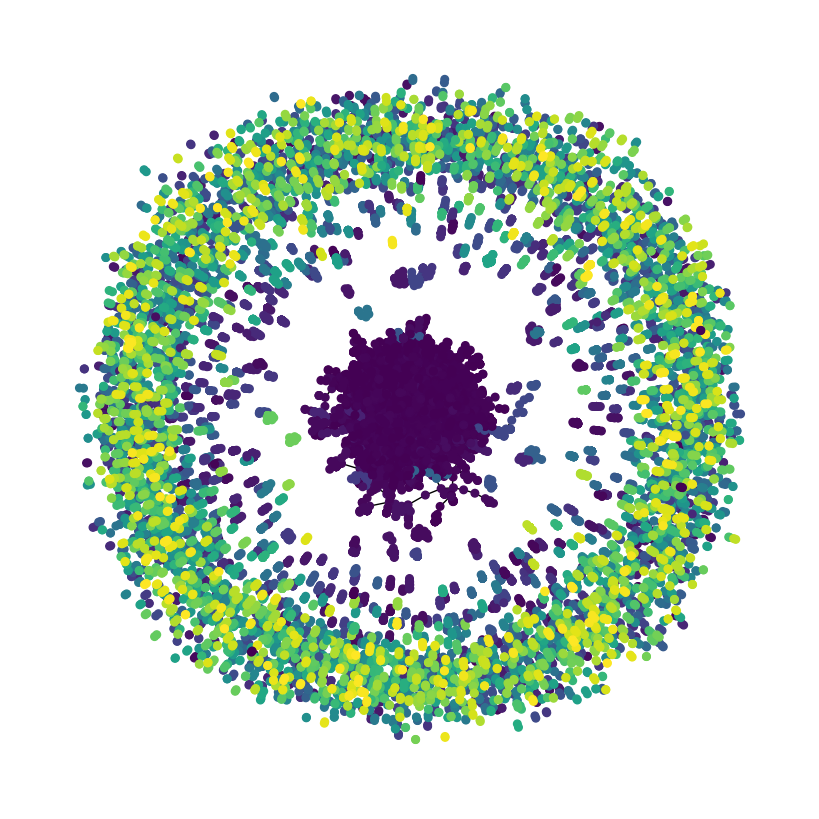

In [ ]:
import hypernetx as hnx
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

# Step 1: Load the directed graph data into a hypergraph
def load_hypergraph_from_file(filename):
    edges = {}
    with open(filename, 'r') as file:
        for line in file:
            parts = list(map(int, line.split()))
            node = parts[0]
            connected_nodes = parts[1:]
            edges[node] = connected_nodes
    return hnx.Hypergraph(edges)

# Step 2: Manually create bipartite graph from hypergraph
def convert_to_bipartite_graph(hypergraph):
    G = nx.Graph()
    # Access the edges from the HyperNetX hypergraph using hypergraph.incidence_dict
    for edge_id, nodes in hypergraph.incidence_dict.items():
        # Create an edge between each node in the hyperedge and the hyperedge itself
        for node in nodes:
            G.add_edge(edge_id, node)
    return G

# Step 3: Apply Louvain algorithm for community detection
def apply_louvain(G):
    partition = community_louvain.best_partition(G)
    return partition

# Step 4: Visualize communities in the bipartite graph
def visualize_communities(G, partition):
    pos = nx.spring_layout(G)
    cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw(G, pos, node_color=[cmap(partition[node]) for node in G.nodes()], with_labels=False, node_size=30)
    plt.show()

# Main function to run the process
def main():
    filename = '/content/drive/My Drive/CSE551/Youtube_communities.txt'  #

    # Step 1: Load the data
    print("Loading directed YouTube network data as a hypergraph...")
    hypergraph = load_hypergraph_from_file(filename)

    # Print the loaded hypergraph dictionary for inspection
    print(f"Loaded hypergraph with {len(hypergraph.edges)} hyperedges.")
    # Correct way to print the first few edges using incidence_dict
    print("Hypergraph edges (first 10 entries):", list(hypergraph.incidence_dict.items())[:10])

    # Step 2: Convert to bipartite graph
    print("Converting hypergraph to bipartite graph...")
    bipartite_graph = convert_to_bipartite_graph(hypergraph)
    print(f"Bipartite graph has {bipartite_graph.number_of_nodes()} nodes and {bipartite_graph.number_of_edges()} edges.")

    # Step 3: Apply Louvain algorithm
    print("Applying Louvain community detection...")
    partition = apply_louvain(bipartite_graph)

    # Step 4: Visualize the communities
    print("Visualizing the communities...")
    visualize_communities(bipartite_graph, partition)

if __name__ == "__main__":
    main()


Loading the first 500 data points from the directed YouTube network data as a hypergraph...
Loaded hypergraph with 420 hyperedges.
Hypergraph edges (first 10 entries): [(1, [5, 571, 626, 678]), (2, [2014, 3438, 95969, 132967, 132972, 132973, 132978, 132981, 132982, 132987, 443577]), (5, [554, 574, 36676, 36679, 36680, 152752]), (11, [1172, 1975, 3053, 3509, 5054, 5104, 6402, 11873, 16388, 24897, 30041, 30227, 133143]), (13, [15, 40, 78, 121, 140, 242, 249, 255, 274, 276, 291, 305, 306, 314, 376, 455, 470, 511, 517, 519, 714, 740, 760, 762, 790, 794, 811, 823, 875, 881, 905, 963, 1024, 1071, 1155, 1249, 1455, 1531, 1709, 1970, 1993, 1999, 2057, 2093, 2252, 2711, 2849, 2856, 2890, 3179, 3220, 3222, 3406, 3440, 3488, 3622, 3670, 3686, 3935, 4079, 4228, 4295, 4396, 4422, 4921, 5036, 5094, 5205, 5418, 5502, 5510, 5541, 5573, 5621, 5768, 5825, 5873, 5906, 5962, 6001, 6035, 6113, 6158, 6169, 6230, 6577, 6663, 6704, 6762, 6766, 6771, 6899, 7115, 7146, 7371, 7561, 7735, 7791, 7794, 7823, 7858, 

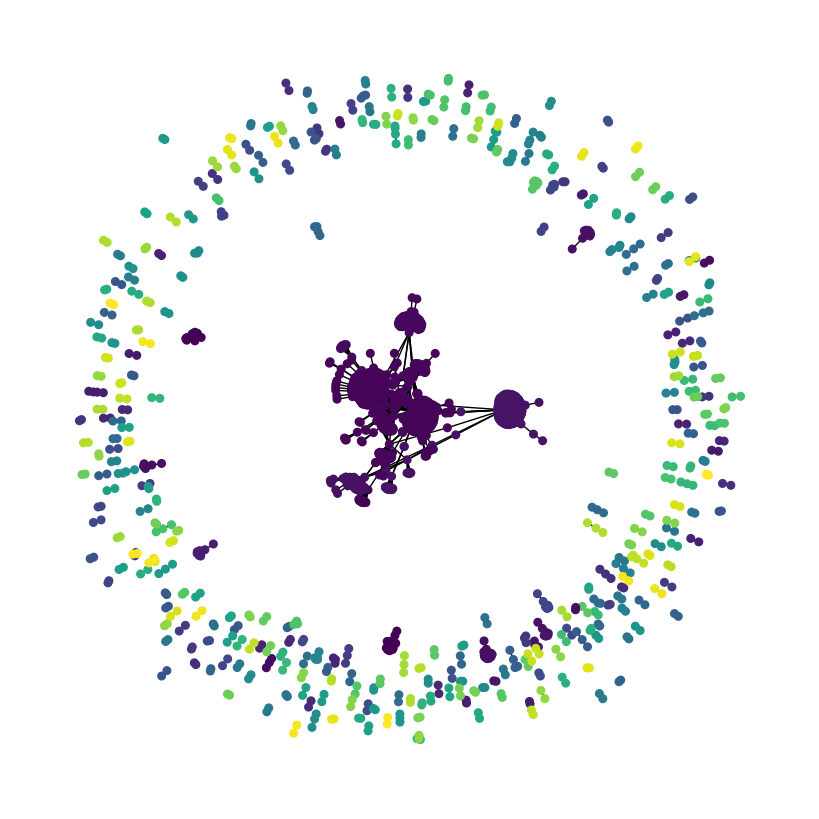

In [ ]:
import hypernetx as hnx
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

# Step 1: Load the first 500 data points from the directed graph data into a hypergraph
def load_hypergraph_from_file(filename, limit=10):
    edges = {}
    with open(filename, 'r') as file:
        for i, line in enumerate(file):
            if i >= limit:  # Stop after reading 500 lines
                break
            parts = list(map(int, line.split()))
            node = parts[0]
            connected_nodes = parts[1:]
            edges[node] = connected_nodes
    return hnx.Hypergraph(edges)

# Step 2: Manually create bipartite graph from hypergraph
def convert_to_bipartite_graph(hypergraph):
    G = nx.Graph()
    # Access the edges from the HyperNetX hypergraph using hypergraph.incidence_dict
    for edge_id, nodes in hypergraph.incidence_dict.items():
        # Create an edge between each node in the hyperedge and the hyperedge itself
        for node in nodes:
            G.add_edge(edge_id, node)
    return G

# Step 3: Apply Louvain algorithm for community detection
def apply_louvain(G):
    partition = community_louvain.best_partition(G)
    return partition

# Step 4: Visualize communities in the bipartite graph
def visualize_communities(G, partition):
    pos = nx.spring_layout(G)
    cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw(G, pos, node_color=[cmap(partition[node]) for node in G.nodes()], with_labels=False, node_size=30)
    plt.show()

# Main function to run the process
def main():
    filename = '/content/drive/My Drive/CSE551/Youtube_communities.txt'
    # Step 1: Load the first 500 data points
    print("Loading the first 500 data points from the directed YouTube network data as a hypergraph...")
    hypergraph = load_hypergraph_from_file(filename, limit=500)

    # Print the loaded hypergraph dictionary for inspection
    print(f"Loaded hypergraph with {len(hypergraph.edges)} hyperedges.")
    # Correct way to print the first few edges using incidence_dict
    print("Hypergraph edges (first 10 entries):", list(hypergraph.incidence_dict.items())[:10])

    # Step 2: Convert to bipartite graph
    print("Converting hypergraph to bipartite graph...")
    bipartite_graph = convert_to_bipartite_graph(hypergraph)
    print(f"Bipartite graph has {bipartite_graph.number_of_nodes()} nodes and {bipartite_graph.number_of_edges()} edges.")

    # Step 3: Apply Louvain algorithm
    print("Applying Louvain community detection...")
    partition = apply_louvain(bipartite_graph)

    # Step 4: Visualize the communities
    print("Visualizing the communities...")
    visualize_communities(bipartite_graph, partition)

if __name__ == "__main__":
    main()




---



---



---



Loading the first 500 data points from the directed YouTube network data as a hypergraph...
Loaded hypergraph with 420 hyperedges.
Hypergraph edges (first 10 entries): [(1, [5, 571, 626, 678]), (2, [2014, 3438, 95969, 132967, 132972, 132973, 132978, 132981, 132982, 132987, 443577]), (5, [554, 574, 36676, 36679, 36680, 152752]), (11, [1172, 1975, 3053, 3509, 5054, 5104, 6402, 11873, 16388, 24897, 30041, 30227, 133143]), (13, [15, 40, 78, 121, 140, 242, 249, 255, 274, 276, 291, 305, 306, 314, 376, 455, 470, 511, 517, 519, 714, 740, 760, 762, 790, 794, 811, 823, 875, 881, 905, 963, 1024, 1071, 1155, 1249, 1455, 1531, 1709, 1970, 1993, 1999, 2057, 2093, 2252, 2711, 2849, 2856, 2890, 3179, 3220, 3222, 3406, 3440, 3488, 3622, 3670, 3686, 3935, 4079, 4228, 4295, 4396, 4422, 4921, 5036, 5094, 5205, 5418, 5502, 5510, 5541, 5573, 5621, 5768, 5825, 5873, 5906, 5962, 6001, 6035, 6113, 6158, 6169, 6230, 6577, 6663, 6704, 6762, 6766, 6771, 6899, 7115, 7146, 7371, 7561, 7735, 7791, 7794, 7823, 7858, 

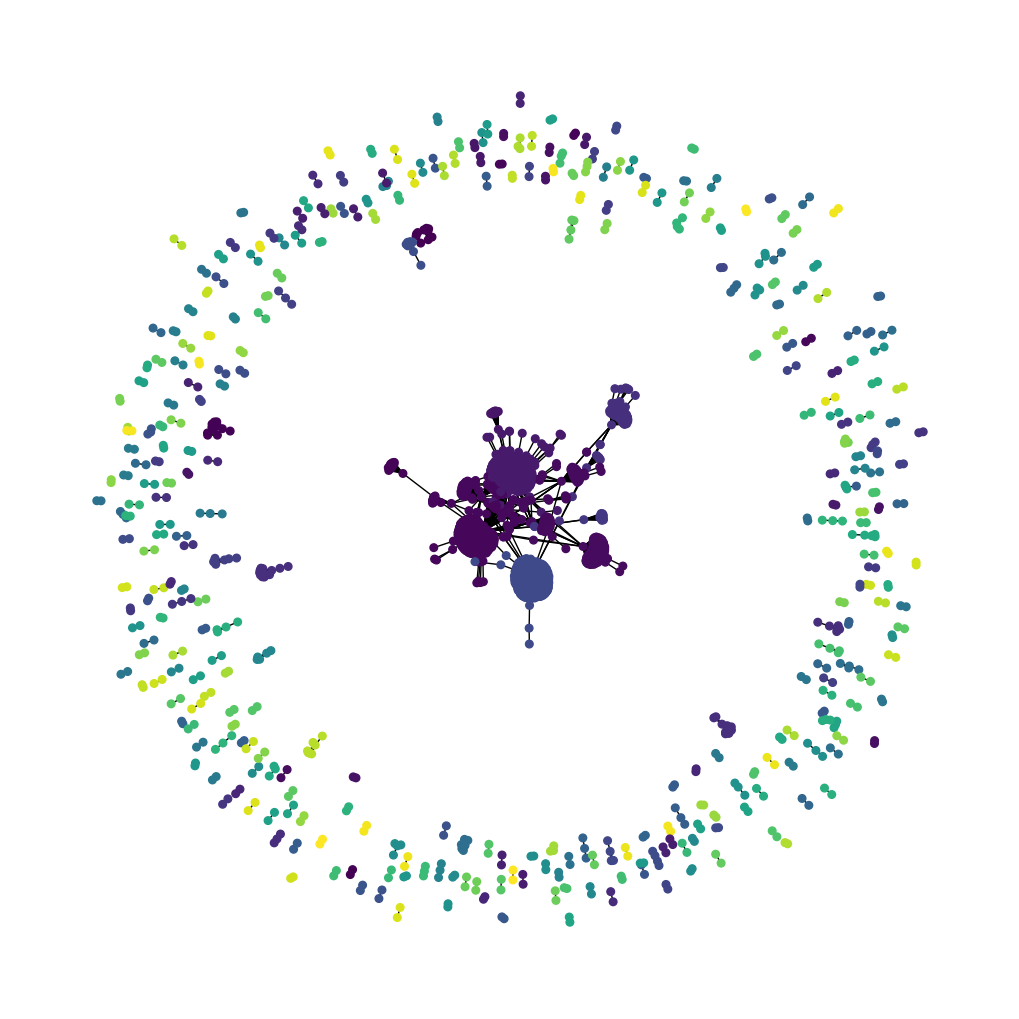

In [ ]:
import hypernetx as hnx
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

# Step 1: Load the first 500 data points from the directed graph data into a hypergraph
def load_hypergraph_from_file(filename, limit=500):
    edges = {}
    with open(filename, 'r') as file:
        for i, line in enumerate(file):
            if i >= limit:  # Stop after reading 500 lines
                break
            parts = list(map(int, line.split()))
            node = parts[0]
            connected_nodes = parts[1:]
            edges[node] = connected_nodes
    return hnx.Hypergraph(edges)

# Step 2: Manually create bipartite graph from hypergraph
def convert_to_bipartite_graph(hypergraph):
    G = nx.Graph()
    # Access the edges from the HyperNetX hypergraph using hypergraph.incidence_dict
    for edge_id, nodes in hypergraph.incidence_dict.items():
        # Create an edge between each node in the hyperedge and the hyperedge itself
        for node in nodes:
            G.add_edge(edge_id, node)
    return G

# Step 3: Apply Louvain algorithm for community detection
def apply_louvain(G):
    partition = community_louvain.best_partition(G)
    return partition

# Step 4: Print and visualize communities in the bipartite graph
def print_and_visualize_communities(G, partition):
    # Print each community and its members
    communities = {}
    for node, community_id in partition.items():
        if community_id not in communities:
            communities[community_id] = []
        communities[community_id].append(node)

    print("\nCommunities Detected:")
    for community_id, members in communities.items():
        print(f"Community {community_id}: {members}")
        print(f"Size of Community {community_id}: {len(members)}\n")

    # Visualize the communities
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
    cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw(G, pos, node_color=[cmap(partition[node]) for node in G.nodes()], with_labels=False, node_size=30)
    plt.show()

# Main function to run the process
def main():
    filename = '/content/drive/My Drive/CSE551/Youtube_communities.txt'

    # Step 1: Load the first 500 data points
    print("Loading the first 500 data points from the directed YouTube network data as a hypergraph...")
    hypergraph = load_hypergraph_from_file(filename, limit=500)

    # Print the loaded hypergraph dictionary for inspection
    print(f"Loaded hypergraph with {len(hypergraph.edges)} hyperedges.")
    print("Hypergraph edges (first 10 entries):", list(hypergraph.incidence_dict.items())[:10])

    # Step 2: Convert to bipartite graph
    print("Converting hypergraph to bipartite graph...")
    bipartite_graph = convert_to_bipartite_graph(hypergraph)
    print(f"Bipartite graph has {bipartite_graph.number_of_nodes()} nodes and {bipartite_graph.number_of_edges()} edges.")

    # Step 3: Apply Louvain algorithm
    print("Applying Louvain community detection...")
    partition = apply_louvain(bipartite_graph)

    # Step 4: Print and visualize the communities
    print("Printing and visualizing the communities...")
    print_and_visualize_communities(bipartite_graph, partition)

if __name__ == "__main__":
    main()


Loading the first 500 data points from the undirected YouTube network data as a hypergraph...
Loaded hypergraph with 4 hyperedges.
Hypergraph edges (first 10 entries): [(1, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 376, 1219, 268635, 317880, 665255, 665256, 665257, 665258]), (2, [4, 40, 106, 107, 126, 134, 242, 247, 276, 291, 341, 363, 365, 367, 404, 446, 455, 480, 495, 514, 534, 688, 718, 723, 730, 762, 776, 797, 803, 839, 840, 847, 848, 851, 881, 882, 903, 940, 967, 1009, 1013, 1070, 1085, 1180, 1183, 1225, 1227, 1244, 1258, 1270, 1708, 1795, 1870, 1999, 2059, 2235, 2243, 2246, 2254, 2266, 2661, 2723, 2775, 2844, 2892, 2974, 3100, 3102, 3120, 3173, 3193, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 

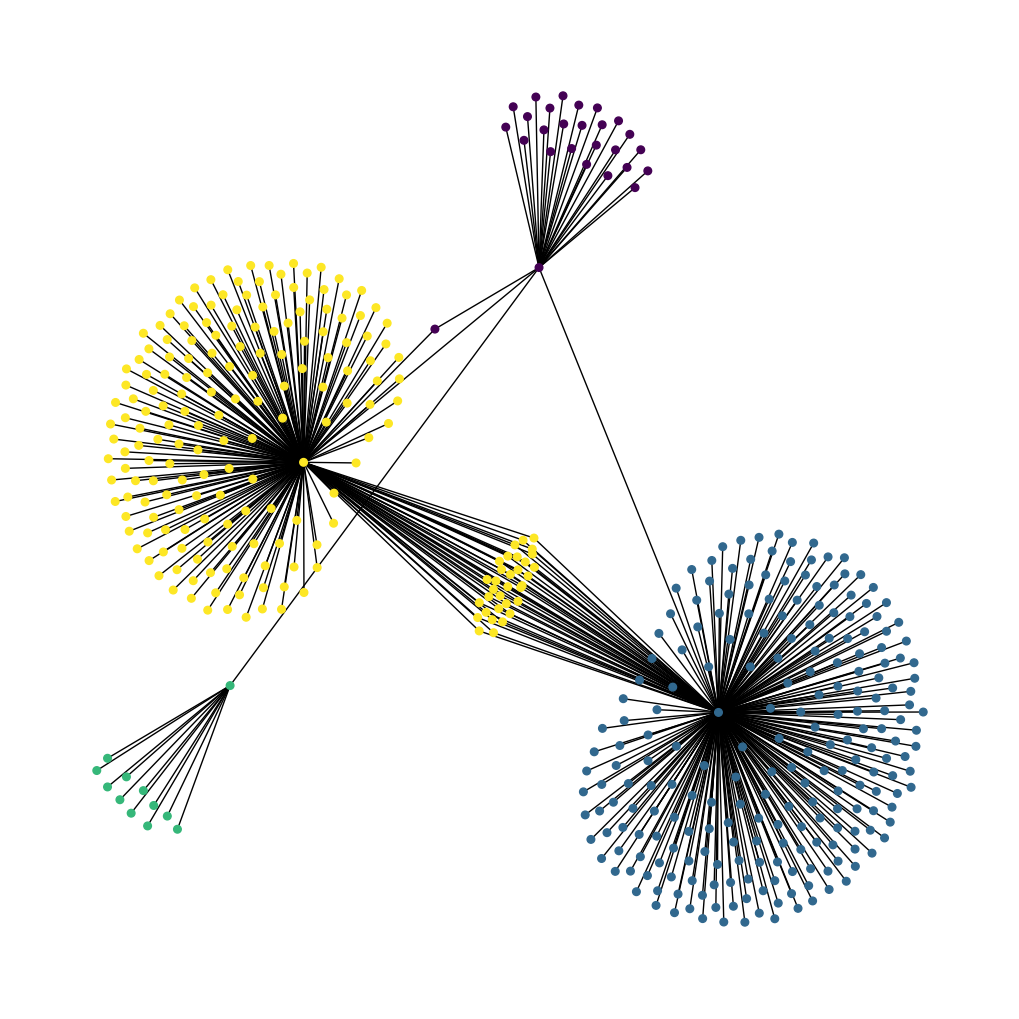

In [ ]:
import hypernetx as hnx
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

# Step 1: Load the first 500 data points from the undirected graph data into a hypergraph
def load_hypergraph_from_file(filename, limit=500):
    edges = {}
    with open(filename, 'r') as file:
        for i, line in enumerate(file):
            if i >= limit:  # Stop after reading 500 lines
                break
            if line.startswith("#"):  # Skip comment lines
                continue
            parts = list(map(int, line.split()))
            node = parts[0]
            connected_nodes = parts[1:]
            if node not in edges:
                edges[node] = connected_nodes
            else:
                edges[node].extend(connected_nodes)  # Add more edges for the node if found
    return hnx.Hypergraph(edges)

# Step 2: Manually create bipartite graph from hypergraph
def convert_to_bipartite_graph(hypergraph):
    G = nx.Graph()
    # Access the edges from the HyperNetX hypergraph using hypergraph.incidence_dict
    for edge_id, nodes in hypergraph.incidence_dict.items():
        # Create an edge between each node in the hyperedge and the hyperedge itself
        for node in nodes:
            G.add_edge(edge_id, node)
    return G

# Step 3: Apply Louvain algorithm for community detection
def apply_louvain(G):
    partition = community_louvain.best_partition(G)
    return partition

# Step 4: Print and visualize communities in the bipartite graph
def print_and_visualize_communities(G, partition):
    # Print each community and its members
    communities = {}
    for node, community_id in partition.items():
        if community_id not in communities:
            communities[community_id] = []
        communities[community_id].append(node)

    print("\nCommunities Detected:")
    for community_id, members in communities.items():
        print(f"Community {community_id}: {members[:10]}...")  # Display first 10 members for brevity
        print(f"Size of Community {community_id}: {len(members)}\n")

    # Visualize the communities
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
    cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw(G, pos, node_color=[cmap(partition[node]) for node in G.nodes()], with_labels=False, node_size=30)
    plt.show()

# Main function to run the process
def main():
    filename = '/content/drive/My Drive/CSE551/Undirected_Youtube_network.txt'  # Path to your undirected YouTube network file

    # Step 1: Load the first 500 data points
    print("Loading the first 500 data points from the undirected YouTube network data as a hypergraph...")
    hypergraph = load_hypergraph_from_file(filename, limit=500)

    # Print the loaded hypergraph dictionary for inspection
    print(f"Loaded hypergraph with {len(hypergraph.edges)} hyperedges.")
    print("Hypergraph edges (first 10 entries):", list(hypergraph.incidence_dict.items())[:10])

    # Step 2: Convert to bipartite graph
    print("Converting hypergraph to bipartite graph...")
    bipartite_graph = convert_to_bipartite_graph(hypergraph)
    print(f"Bipartite graph has {bipartite_graph.number_of_nodes()} nodes and {bipartite_graph.number_of_edges()} edges.")

    # Step 3: Apply Louvain algorithm
    print("Applying Louvain community detection...")
    partition = apply_louvain(bipartite_graph)

    # Step 4: Print and visualize the communities
    print("Printing and visualizing the communities...")
    print_and_visualize_communities(bipartite_graph, partition)

if __name__ == "__main__":
    main()


# **Undirected Youtube network HnX & Louvian**

***50000 data***

In [ ]:
import hypernetx as hnx
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

# Step 1: Load the first 500 data points from the undirected graph data into a hypergraph
def load_hypergraph_from_file(filename, limit=50000):
    edges = {}
    with open(filename, 'r') as file:
        for i, line in enumerate(file):
            if i >= limit:  # Stop after reading 50000 lines
                break
            if line.startswith("#"):  # Skip comment lines
                continue
            parts = list(map(int, line.split()))
            node = parts[0]
            connected_nodes = parts[1:]
            if node not in edges:
                edges[node] = connected_nodes
            else:
                edges[node].extend(connected_nodes)  # Add more edges for the node if found
    return hnx.Hypergraph(edges)

# Step 2: Manually create bipartite graph from hypergraph
def convert_to_bipartite_graph(hypergraph):
    G = nx.Graph()
    # Access the edges from the HyperNetX hypergraph using hypergraph.incidence_dict
    for edge_id, nodes in hypergraph.incidence_dict.items():
        # Create an edge between each node in the hyperedge and the hyperedge itself
        for node in nodes:
            G.add_edge(edge_id, node)
    return G

# Step 3: Apply Louvain algorithm for community detection
def apply_louvain(G):
    partition = community_louvain.best_partition(G)
    return partition

# Step 4: Print and visualize communities in the bipartite graph
def print_and_visualize_communities(G, partition):
    # Print each community and its members
    communities = {}
    for node, community_id in partition.items():
        if community_id not in communities:
            communities[community_id] = []
        communities[community_id].append(node)

    print("\nCommunities Detected:")
    for community_id, members in communities.items():
        print(f"Community {community_id}: {members[:10]}...")  # Display first 10 members for brevity
        print(f"Size of Community {community_id}: {len(members)}\n")

    # Visualize the communities
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
    cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw(G, pos, node_color=[cmap(partition[node]) for node in G.nodes()], with_labels=False, node_size=30)
    plt.show()


Loading the first 500 data points from the undirected YouTube network data as a hypergraph...
Loaded hypergraph with 273 hyperedges.
Hypergraph edges (first 10 entries): [(1, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 376, 1219, 268635, 317880, 665255, 665256, 665257, 665258]), (2, [4, 40, 106, 107, 126, 134, 242, 247, 276, 291, 341, 363, 365, 367, 404, 446, 455, 480, 495, 514, 534, 688, 718, 723, 730, 762, 776, 797, 803, 839, 840, 847, 848, 851, 881, 882, 903, 940, 967, 1009, 1013, 1070, 1085, 1180, 1183, 1225, 1227, 1244, 1258, 1270, 1708, 1795, 1870, 1999, 2059, 2235, 2243, 2246, 2254, 2266, 2661, 2723, 2775, 2844, 2892, 2974, 3100, 3102, 3120, 3173, 3193, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404

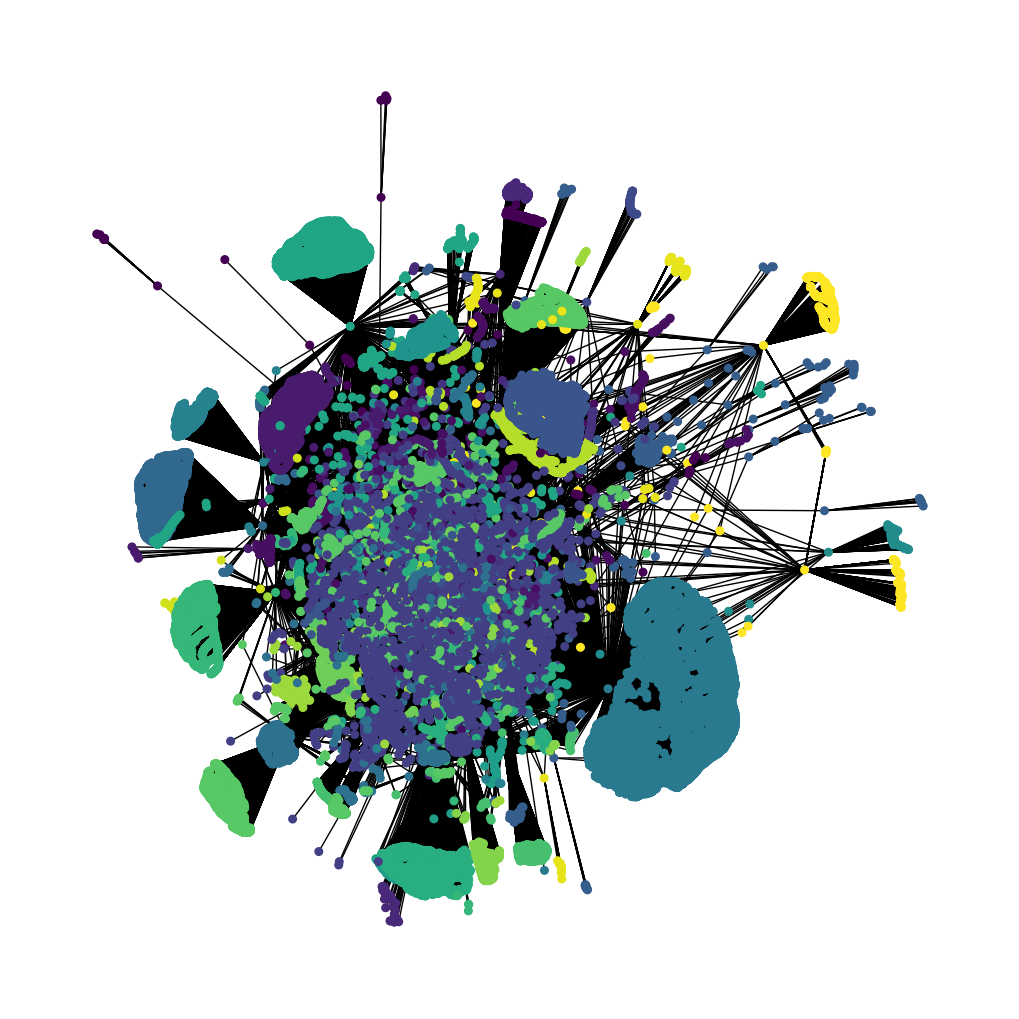

In [ ]:
# Main function to run the process
def main():
    filename = '/content/drive/My Drive/CSE551/Undirected_Youtube_network.txt'  # Path to your undirected YouTube network file

    # Step 1: Load the first 500 data points
    print("Loading the first 500 data points from the undirected YouTube network data as a hypergraph...")
    hypergraph = load_hypergraph_from_file(filename, limit=50000)

    # Print the loaded hypergraph dictionary for inspection
    print(f"Loaded hypergraph with {len(hypergraph.edges)} hyperedges.")
    print("Hypergraph edges (first 10 entries):", list(hypergraph.incidence_dict.items())[:10])

    # Step 2: Convert to bipartite graph
    print("Converting hypergraph to bipartite graph...")
    bipartite_graph = convert_to_bipartite_graph(hypergraph)
    print(f"Bipartite graph has {bipartite_graph.number_of_nodes()} nodes and {bipartite_graph.number_of_edges()} edges.")

    # Step 3: Apply Louvain algorithm
    print("Applying Louvain community detection...")
    partition = apply_louvain(bipartite_graph)

    # Step 4: Print and visualize the communities
    print("Printing and visualizing the communities...")
    print_and_visualize_communities(bipartite_graph, partition)

if __name__ == "__main__":
    main()




---


***2000 data***

---



Loading the first 2000 edges from YouTube network data...
Graph has 1936 nodes and 2000 edges.
Applying Louvain community detection...
Calculating modularity...
Modularity: 0.245020375
Visualizing the detected communities...


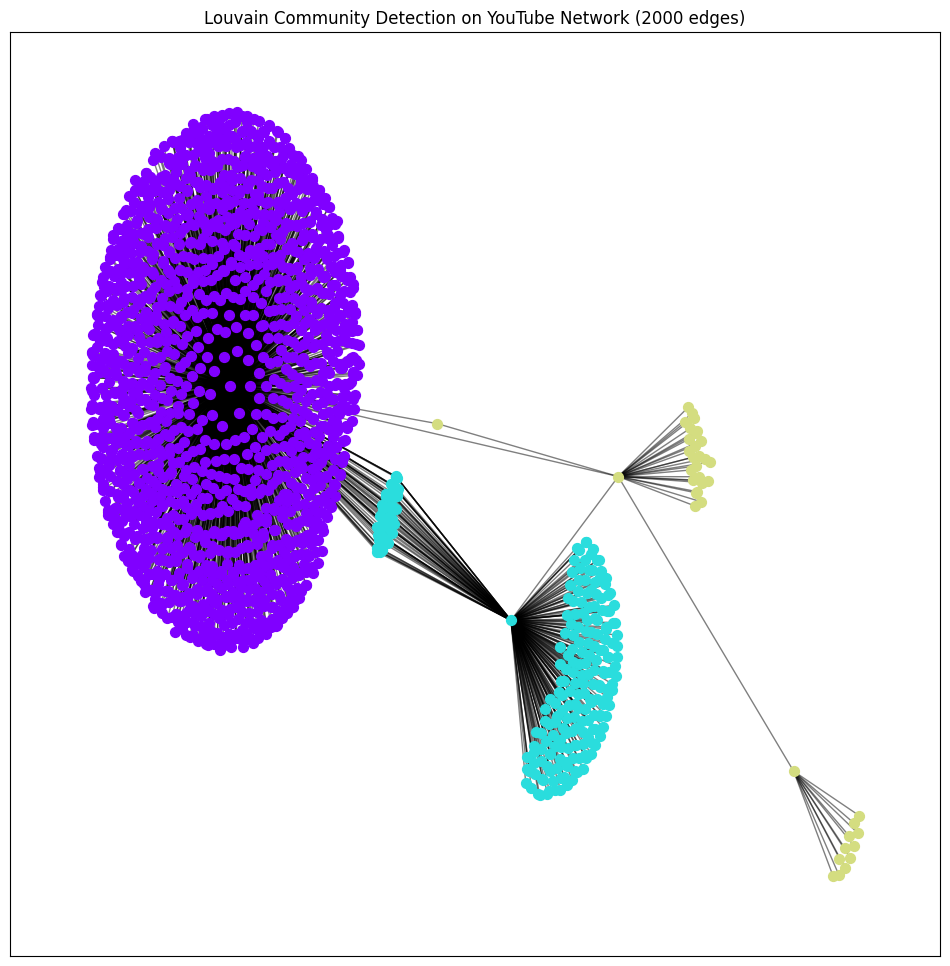

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
import networkx.algorithms.community as nx_comm

# Step 1: Load the first 2000 data points from the file
def load_undirected_youtube_data(file_path, num_edges=2000):
    """Load the first num_edges edges from an undirected network."""
    G = nx.Graph()
    with open(file_path, 'r') as file:
        for line in file:
            # Skip comment lines
            if line.startswith("#"):
                continue
            # Add the first num_edges edges to the graph
            u, v = map(int, line.strip().split())
            G.add_edge(u, v)
            if G.number_of_edges() >= num_edges:
                break
    return G

# Step 2: Apply Louvain community detection
def apply_louvain_community_detection(G):
    """Apply Louvain algorithm for community detection."""
    partition = community_louvain.best_partition(G)
    return partition

# Step 3: Calculate Modularity
def calculate_modularity(G, partition):
    """Calculate the modularity of the graph with given partition."""
    communities = {}
    for node, community in partition.items():
        if community not in communities:
            communities[community] = []
        communities[community].append(node)
    communities_list = [set(nodes) for nodes in communities.values()]
    modularity = nx_comm.modularity(G, communities_list)
    return modularity

# Step 4: Visualize the communities
def visualize_communities(G, partition):
    """Visualize the graph and its communities."""
    plt.figure(figsize=(12, 12))

    # Get the communities
    pos = nx.spring_layout(G, seed=42)  # Positions for all nodes
    cmap = plt.get_cmap('rainbow')
    communities = set(partition.values())
    colors = [cmap(i / len(communities)) for i in range(len(communities))]

    # Draw each community with a different color
    for community in communities:
        members = [node for node, comm in partition.items() if comm == community]
        nx.draw_networkx_nodes(G, pos, nodelist=members, node_size=50, node_color=[colors[community]])

    # Draw the edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title("Louvain Community Detection on YouTube Network (2000 edges)")
    plt.show()

# Main function to run the process
def main():
    filename = '/content/drive/My Drive/CSE551/Undirected_Youtube_network.txt'  # Path to your file

    # Step 1: Load the data
    print("Loading the first 2000 edges from YouTube network data...")
    G = load_undirected_youtube_data(filename, num_edges=2000)
    print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

    # Step 2: Apply Louvain community detection
    print("Applying Louvain community detection...")
    partition = apply_louvain_community_detection(G)

    # Step 3: Calculate modularity
    print("Calculating modularity...")
    modularity = calculate_modularity(G, partition)
    print(f"Modularity: {modularity}")

    # Step 4: Visualize the communities
    print("Visualizing the detected communities...")
    visualize_communities(G, partition)

if __name__ == "__main__":
    main()
